<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/CHAHE_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    ITALIC = '\x1B'

In [1]:
from google.colab import drive; drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os 
wd_pth = '/content/drive/MyDrive/CLAHE'
os.chdir(wd_pth)

if os.getcwd() == wd_pth:
    print(f'\n\t {wd_pth}')
else:
    print('')


	 /content/drive/MyDrive/CLAHE


In [3]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

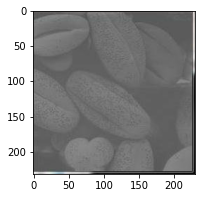

In [65]:
img_pth = f"{wd_pth}/{[x for x in os.listdir(wd_pth) if x.endswith('png')][0]}"
# gray scale = 1
img = cv2.imread(img_pth, 1)

plt.figure( figsize=(3, 3) )
plt.imshow(img)
plt.show()

In [9]:
Lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(Lab_img)

<font size = 5><font color = 'blue'>**---**</font>

<font size = 2>테스트를 위해 'luminosity'에 대한 값만을 'equalization ( 균등화 )'을 통해 stretching한 결과를 살펴본다.</font>

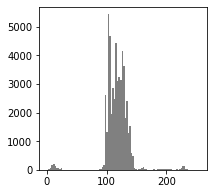

In [63]:
plt.figure( figsize=(3, 3) )

# ***
org_dist, cvt_dist, vis = plt.hist(L.flat, 
                                   bins=100, 
                                   range=(0,255),
                                   color='grey')
# ***

plt.show()

[ 499.  521.  450.  642.    0.    0.    0. 1669.  624.  699.    0. 1008.
    0.    0.    0.    0. 2584.    0.    0. 1831.    0.    0.    0. 2129.
    0.    0. 1506.    0. 1033.    0.  993.    0.  951.    0.  966.  910.
    0.  978.    0. 1121.    0. 1366.    0.    0. 1454.    0.    0. 1516.
    0.    0. 1504.    0.    0.    0.    0.    0. 3102.    0.    0. 1598.
    0.    0. 1595.    0.    0. 1563.    0.    0. 1566.    0. 1478.    0.
    0. 1335.    0.    0. 1330.    0. 1314.    0. 1209.    0. 1103.    0.
  991.    0.  809.  796.    0.  876.  719.  677.  607.    0. 1098.    0.
 1040.  354.  705.  541.] 



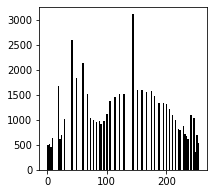

In [64]:
plt.figure( figsize=(3, 3) )

# ***
equ_org_dist, equ_cvt_dist, _vis = plt.hist(cv2.equalizeHist(L).flat, 
                                   bins=100, 
                                   range=(0,255),
                                   color='black')
# ***

print(f'{equ_org_dist}{color.END} \n')
plt.show()

<font size = 2>'Histogram-equalization'의 목적대로 'contrast'에 대한 pixel's intensity가 조정되었지만 원지않는 noise들이 생성됨을 확인할 수 있다. 너무 밝거나 너무 어두운 부분이 이에 해당한다. 이 정도를 제한하기 위한 목적으로 'contrast limiting'과정이 요구된다.</font>

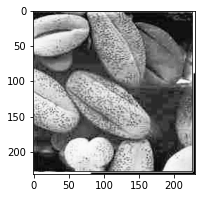

In [70]:
plt.figure( figsize=(3,3) )
plt.imshow(cv2.equalizeHist(L), cmap='gray')
plt.show()

<font size = 5><font color = 'blue'>**---**</font>

<font size = 4>***CLAHE***</font>

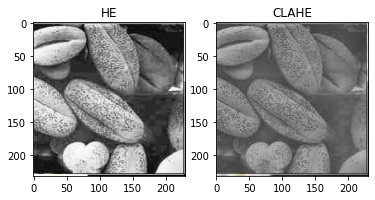

In [78]:
# HE
_Updated_LAB_img = cv2.merge( (cv2.equalizeHist(L), a, b) )
HE_RGB_img = cv2.cvtColor(_Updated_LAB_img, cv2.COLOR_LAB2BGR)

# CLAHE
CLAHE = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
CLAHE_img = CLAHE.apply(L)
Updated_LAB_img = cv2.merge( (CLAHE_img, a, b) )
CLAHE_RGB_img = cv2.cvtColor(Updated_LAB_img, cv2.COLOR_LAB2BGR) 

cvt_img_info = [HE_RGB_img, CLAHE_RGB_img]
_cvt_img_info = ['HE', 'CLAHE']
plt.figure(figsize = (6, 3))
for i in range(1, 3):
    j=i-1
    plt.subplot(1, 2, i)
    img = cvt_img_info[j]
    plt.title(_cvt_img_info[j])
    plt.imshow(img)